In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 


from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans



import seaborn as sn

### Load and create DataFrame

In [2]:
df = pd.read_csv('df_audio_features_1000.csv')
df.head(10)

name               artist  \
0                                  All Shook Up        Elvis Presley   
1  I've Got You Under My Skin - Remastered 1998        Frank Sinatra   
2                       Smoke Gets In Your Eyes         The Platters   
3                       What'd I Say, Pt. 1 & 2          Ray Charles   
4                    Dream A Little Dream Of Me      Ella Fitzgerald   
5                            That'll Be The Day          Buddy Holly   
6                                Blueberry Hill          Fats Domino   
7                                Mack the Knife          Bobby Darin   
8                     All I Have to Do Is Dream  The Everly Brothers   
9                                   Sea Of Love        Phil Phillips   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.624   0.468   10   -12.162     1       0.1320         0.881   
1         0.585   0.247    1   -12.612     1       0.0400         0.452   
2         0.290   0.227    3   -13.060     1       0.0311         0.944   
3         0.540   0.681    4    -5.440     1       0.0508         0.808   
4         0.455   0.167    0   -13.613     1       0.0739         0.918   
5         0.536   0.637    2    -7.774     1       0.0343         0.467   
6         0.489   0.499   11    -9.702     1       0.0271         0.740   
7         0.549   0.529    3   -12.291     0       0.1080         0.760   
8         0.542   0.347    4   -14.011     1       0.0268         0.783   
9         0.289   0.353    7   -12.302     1       0.0292         0.862   

   instrumentalness  liveness  valence    tempo  type  duration_ms  \
0          0.000006    0.1440    0.952   74.139   NaN       117080   
1          0.000009    0.1070    0.591  127.150   NaN       223760   
2          0.000079    0.6170    0.224  114.278   NaN       157293   
3          0.000000    0.1620    0.794   88.385   NaN       307053   
4          0.000000    0.1730    0.404   76.118   NaN       185067   
5          0.000000    0.0838    0.798  115.240   NaN       150133   
6          0.000236    0.1560    0.829  133.341   NaN       147880   
7          0.000000    0.2060    0.464   82.755   NaN       184333   
8          0.000000    0.1440    0.596  103.709   NaN       141240   
9          0.000001    0.1720    0.312   85.436   NaN       144600   

   time_signature                      id  \
0               4  5ueyLj6e6oVaTY0KQ6yLaA   
1               4  3aEJMh1cXKEjgh52claxQp   
2               4  307XEC1IUwUs9ojlEFwH7f   
3               4  5yQ9iMZXGcr5rlO4hoLsP4   
4               4  3vFVS2WYHDG4KkWCNecvpn   
5               4  50RwvvEKX5Q7AZt8FTAwIF   
6               3  06PdA0DLgF4BfAeUNZAbFG   
7               4  3E5ndyOfO6vFDEIE42HA8o   
8               4  72nqbbrKjhXmDdRXQGq115   
9               4  14T8UhqU8EaJpp3tRxqJbr   

                                                html  
0  https://open.spotify.com/track/5ueyLj6e6oVaTY0...  
1  https://open.spotify.com/track/3aEJMh1cXKEjgh5...  
2  https://open.spotify.com/track/307XEC1IUwUs9oj...  
3  https://open.spotify.com/track/5yQ9iMZXGcr5rlO...  
4  https://open.spotify.com/track/3vFVS2WYHDG4KkW...  
5  https://open.spotify.com/track/50RwvvEKX5Q7AZt...  
6  https://open.spotify.com/track/06PdA0DLgF4BfAe...  
7  https://open.spotify.com/track/3E5ndyOfO6vFDEI...  
8  https://open.spotify.com/track/72nqbbrKjhXmDdR...  
9  https://open.spotify.com/track/14T8UhqU8EaJpp3...

### Drop Columns

In [4]:
df = df.drop(columns = ["name", "artist", "id", "html"])
df.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.624   0.468   10   -12.162     1       0.1320         0.881   
1         0.585   0.247    1   -12.612     1       0.0400         0.452   
2         0.290   0.227    3   -13.060     1       0.0311         0.944   
3         0.540   0.681    4    -5.440     1       0.0508         0.808   
4         0.455   0.167    0   -13.613     1       0.0739         0.918   

   instrumentalness  liveness  valence    tempo  type  duration_ms  \
0          0.000006     0.144    0.952   74.139   NaN       117080   
1          0.000009     0.107    0.591  127.150   NaN       223760   
2          0.000079     0.617    0.224  114.278   NaN       157293   
3          0.000000     0.162    0.794   88.385   NaN       307053   
4          0.000000     0.173    0.404   76.118   NaN       185067   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4

### Normalize Data

In [5]:
# create the scaler
scaler = MinMaxScaler( feature_range= (0,1) )

scaler.fit(df[["danceability"]]) 
df["danceability"]  = scaler.transform(df[["danceability"]])

scaler.fit(df[["energy"]]) 
df["energy"]  = scaler.transform(df[["energy"]])

scaler.fit(df[["key"]]) 
df["key"]  = scaler.transform(df[["key"]])

scaler.fit(df[["loudness"]]) 
df["loudness"]  = scaler.transform(df[["loudness"]])


scaler.fit(df[["mode"]]) 
df["mode"]  = scaler.transform(df[["mode"]])

scaler.fit(df[["speechiness"]]) 
df["speechiness"]  = scaler.transform(df[["speechiness"]])

scaler.fit(df[["acousticness"]]) 
df["acousticness"]  = scaler.transform(df[["acousticness"]])

scaler.fit(df[["instrumentalness"]]) 
df["instrumentalness"]  = scaler.transform(df[["instrumentalness"]])

scaler.fit(df[["liveness"]]) 
df["liveness"]  = scaler.transform(df[["liveness"]])


scaler.fit(df[["valence"]]) 
df["valence"]  = scaler.transform(df[["valence"]])

scaler.fit(df[["tempo"]]) 
df["tempo"]  = scaler.transform(df[["tempo"]])

scaler.fit(df[["duration_ms"]]) 
df["duration_ms"]  = scaler.transform(df[["duration_ms"]])

scaler.fit(df[["time_signature"]]) 
df["time_signature"]  = scaler.transform(df[["time_signature"]])

df.head()



danceability    energy       key  loudness  mode  speechiness  \
0      0.624060  0.469869  0.909091  0.708800   1.0     0.196816   
1      0.580938  0.247977  0.090909  0.698907   1.0     0.030391   
2      0.254755  0.227896  0.272727  0.689059   1.0     0.014291   
3      0.531181  0.683728  0.363636  0.856565   1.0     0.049928   
4      0.437196  0.167654  0.000000  0.676903   1.0     0.091715   

   acousticness  instrumentalness  liveness   valence     tempo  type  \
0      0.884538          0.000006  0.127865  0.965817  0.156106   NaN   
1      0.453814          0.000009  0.089495  0.591879  0.494567   NaN   
2      0.947791          0.000081  0.618376  0.211726  0.412383   NaN   
3      0.811245          0.000000  0.146531  0.802155  0.247063   NaN   
4      0.921687          0.000000  0.157938  0.398177  0.168742   NaN   

   duration_ms  time_signature  
0     0.014474            0.75  
1     0.042899            0.75  
2     0.025189            0.75  
3     0.065093            0.75  
4     0.032589            0.75

## K-Means, build and train the model

### Find the right K-Value

#### 1. Elbow Method

In [6]:
list_of_inertias = []
k_range = range(2, 10)

for k in k_range:
    model = KMeans(n_clusters = k)

    # Fit the model 
    model.fit(df[['danceability', 'energy',	'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature' ]]) # calculate the centroids
    
    # add the error to the list
    list_of_inertias.append(model.inertia_) 

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

#### Plot Elbow

Text(0, 0.5, 'Error')

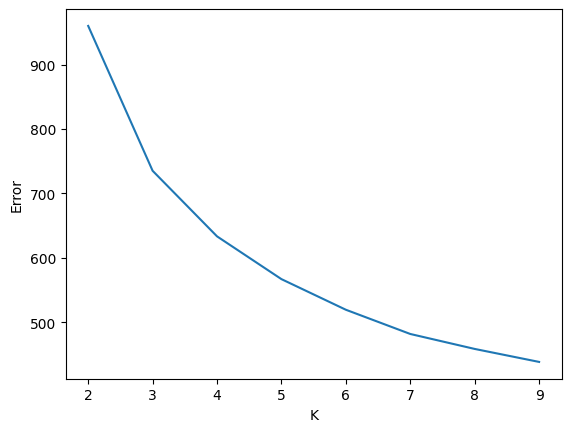

In [7]:
# Plot the Error list
plt.plot(k_range, list_of_inertias)
plt.xlabel("K")
plt.ylabel("Error")

### 2. Silhouete Score

In [8]:
list_of_silhouetescores = []
k_range = range(2, 10)

for k in k_range:
    model = KMeans(n_clusters = k)

    # Fit the model 
    model.fit(df[['danceability', 'energy',	'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']]) # calculate the centroids
    
    # add the error to the list
    s_score = silhouette_score(df[['danceability', 'energy',	'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']], model.labels_)
    
    list_of_silhouetescores.append(s_score)

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

#### Plot Silhouette

Text(0, 0.5, 'Silh. Score')

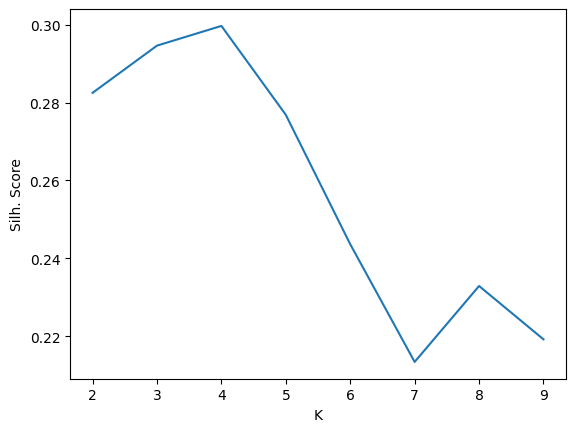

In [9]:
plt.plot(k_range, list_of_silhouetescores)
plt.xlabel("K")
plt.ylabel("Silh. Score")

## K-Means

In [11]:
model = KMeans(n_clusters= 4)

# Fit the model and Assign the rows to the clusters
y_predicted_kmeans = model.fit_predict(df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']])
y_predicted_kmeans

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 2, ..., 2, 2, 2])

### Pairplot

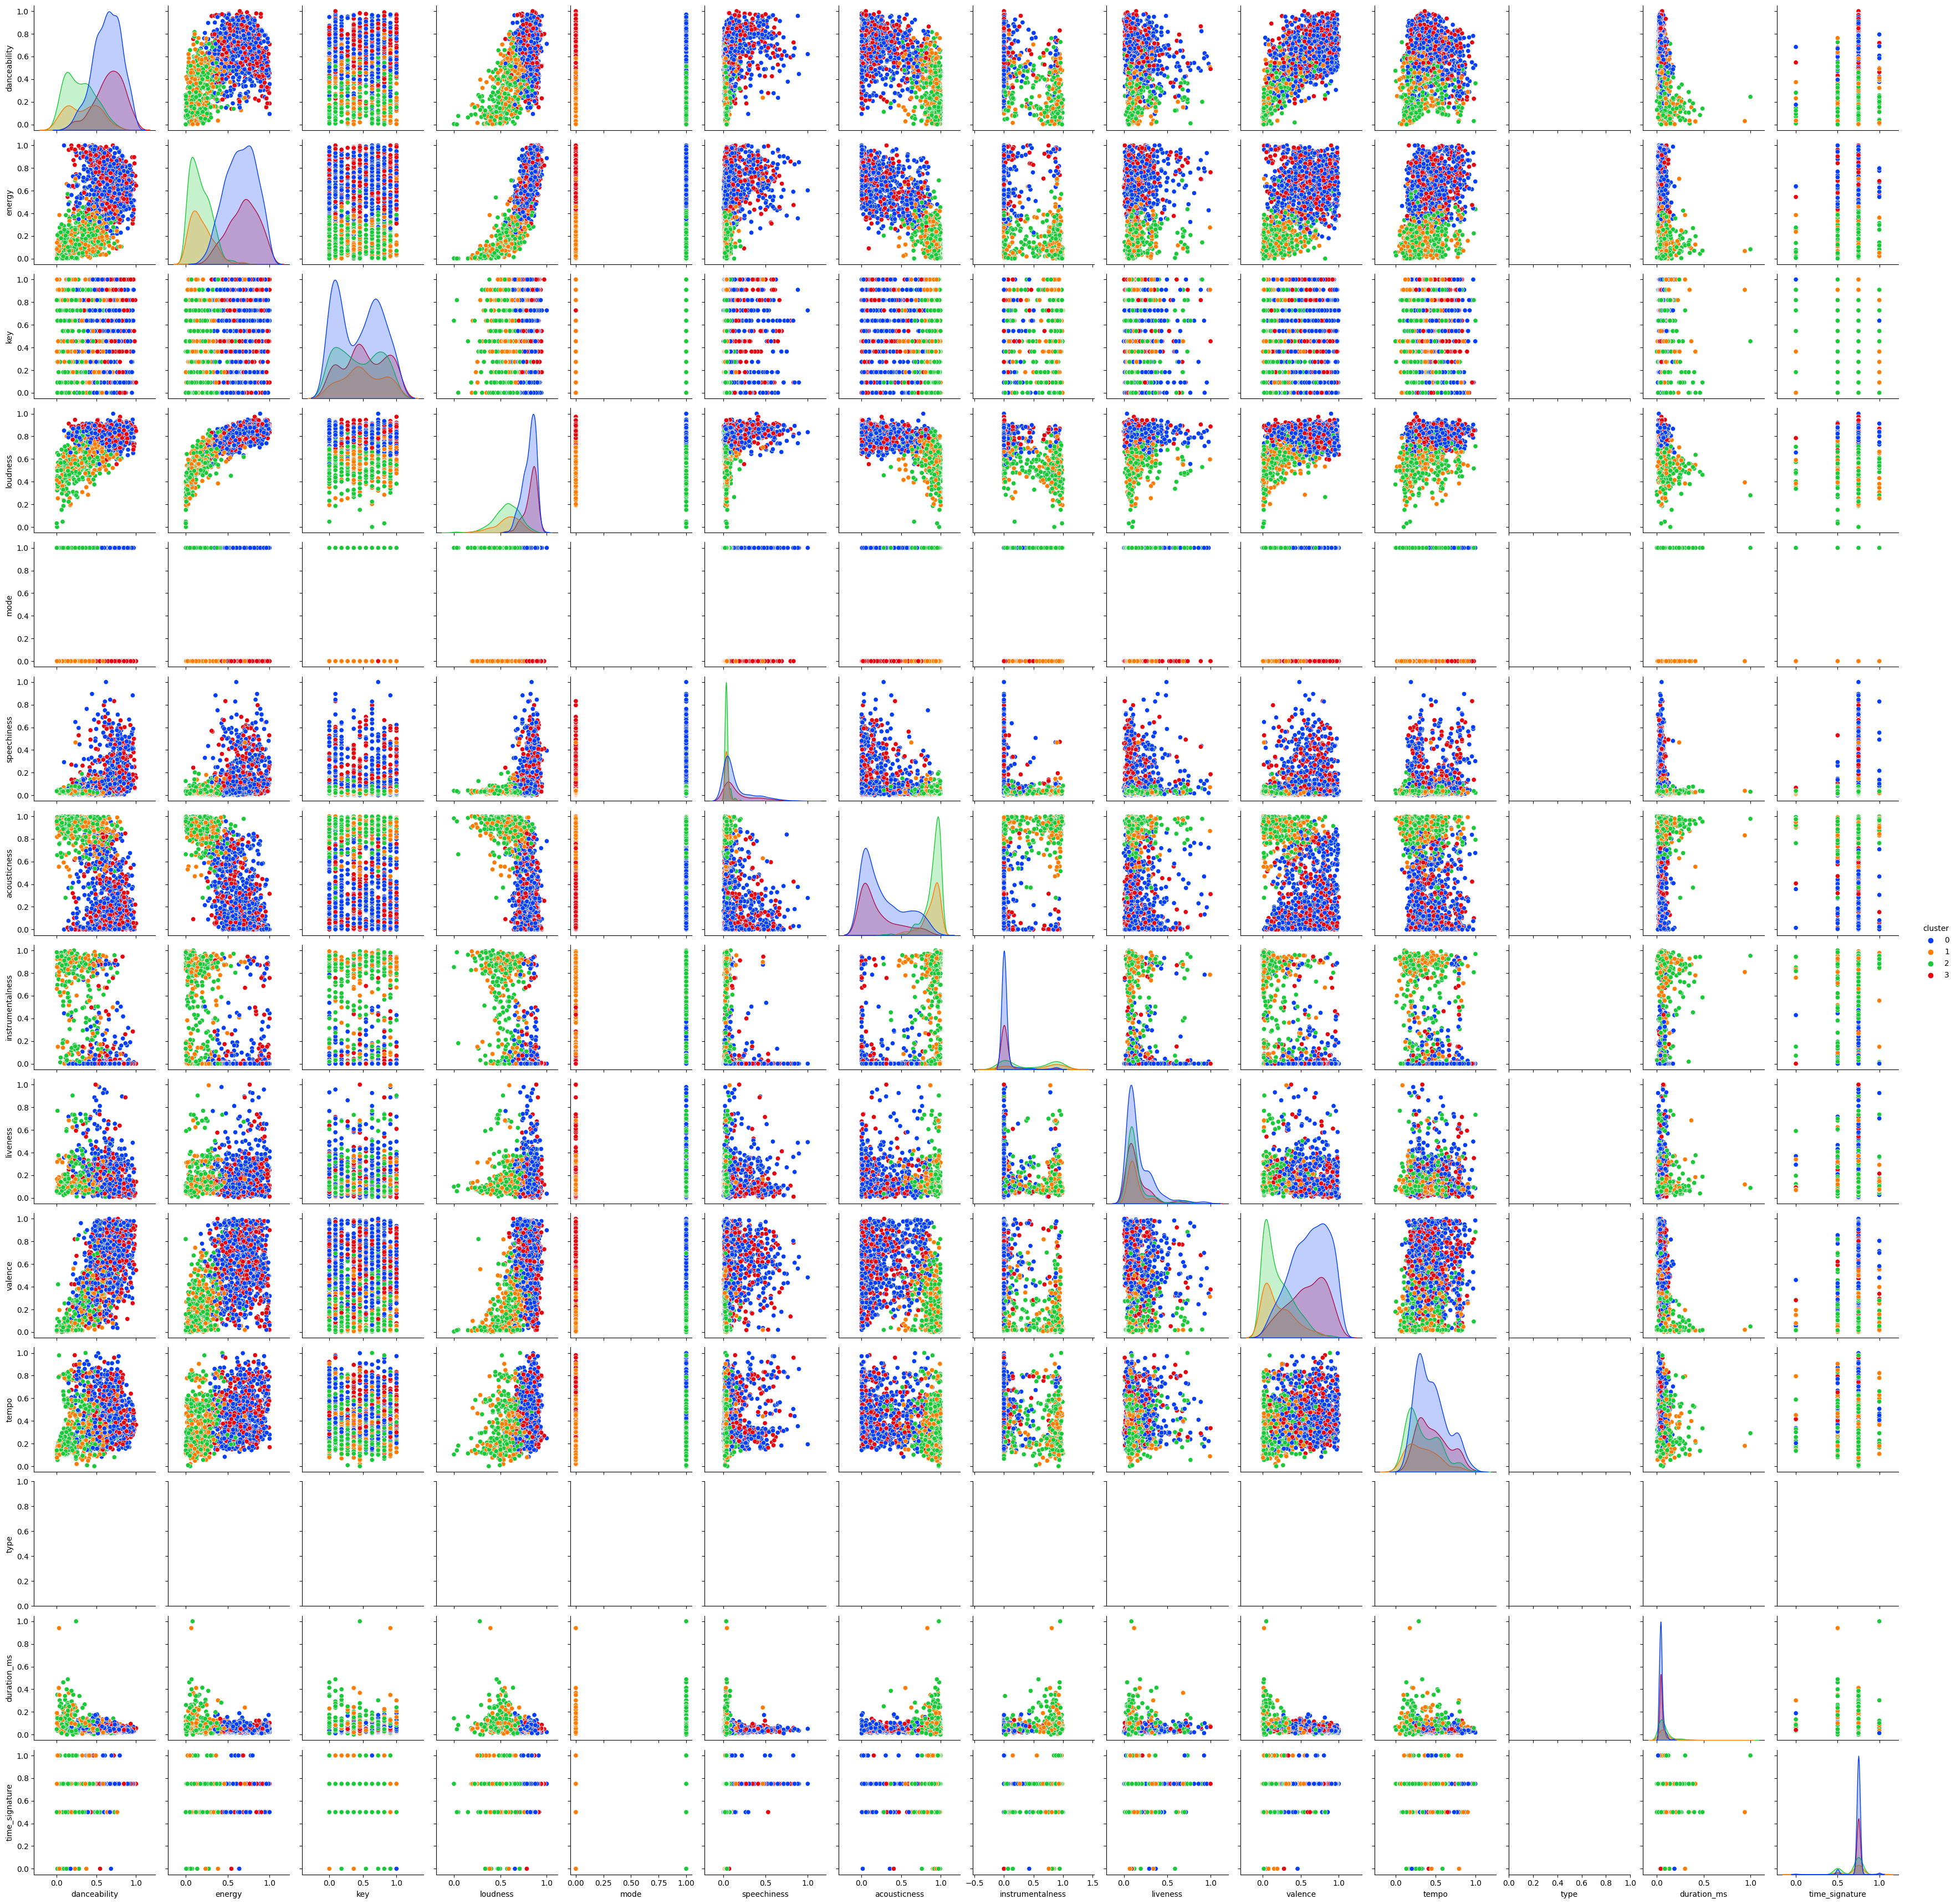

In [12]:
# Attach the predicted clusted into the main df
df["cluster"] = y_predicted_kmeans
sn.pairplot(df, hue = 'cluster', palette= 'bright')